## Heart Disease Predict Model

This model can be used to predict whether a patient has heart disease.

In [90]:
import pandas as pd

from sklearn import tree
from sklearn import model_selection

from matplotlib import pyplot as plt
import altair as alt

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defe

In [91]:
def getData():
    path = "data/heart.csv"
    df = pd.read_csv(path)
    return df

In [92]:
df = getData()

In [93]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [186]:
groupMean = df.groupby("target").mean().stack().reset_index()
groupMean.columns=["target","feature","mean"]

In [194]:
alt.Chart(groupMean).mark_bar().encode(
#     alt.X2("target:O"),
    alt.X("feature"),
    alt.Y("mean")
)

alt.Chart(...)

In [129]:
table = df.corr()["target"]
table.index.name = "feature"
table = table.reset_index()
table

,feature,target
0,age,-0.225439
1,sex,-0.280937
2,cp,0.433798
3,trestbps,-0.144931
4,chol,-0.085239
5,fbs,-0.028046
6,restecg,0.137230
7,thalach,0.421741
8,exang,-0.436757
9,oldpeak,-0.430696


In [180]:
chart = alt.Chart(table.reset_index().round(2)).mark_bar().encode(
    alt.Y("feature:N",sort=None),
    alt.X("target:Q"), 
    tooltip="target:N",
    color=alt.condition(alt.datum.target > 0,alt.value('skyblue'), alt.value('lightgray'))
).properties(height=400, width=600)
chart

alt.Chart(...)

In [96]:
featureNames = list(df.columns)
className = "target"
featureNames.remove(className)

Xdata = df[featureNames]
ydata = df[className]
X = Xdata.values
y = ydata.values.flatten()
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.2)

In [97]:
model = tree.DecisionTreeClassifier(max_leaf_nodes=10)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:

crossTabel = pd.crosstab(ytest, model.predict(Xtest), rownames=["Actual"], colnames=["predict"])
crossTabel

predict,0,1
Actual,,
0,20,8
1,5,28


In [99]:
score = model.score(Xtest, ytest)
print(f"Accurate rate: {score:.2f}")

Accurate rate: 0.79


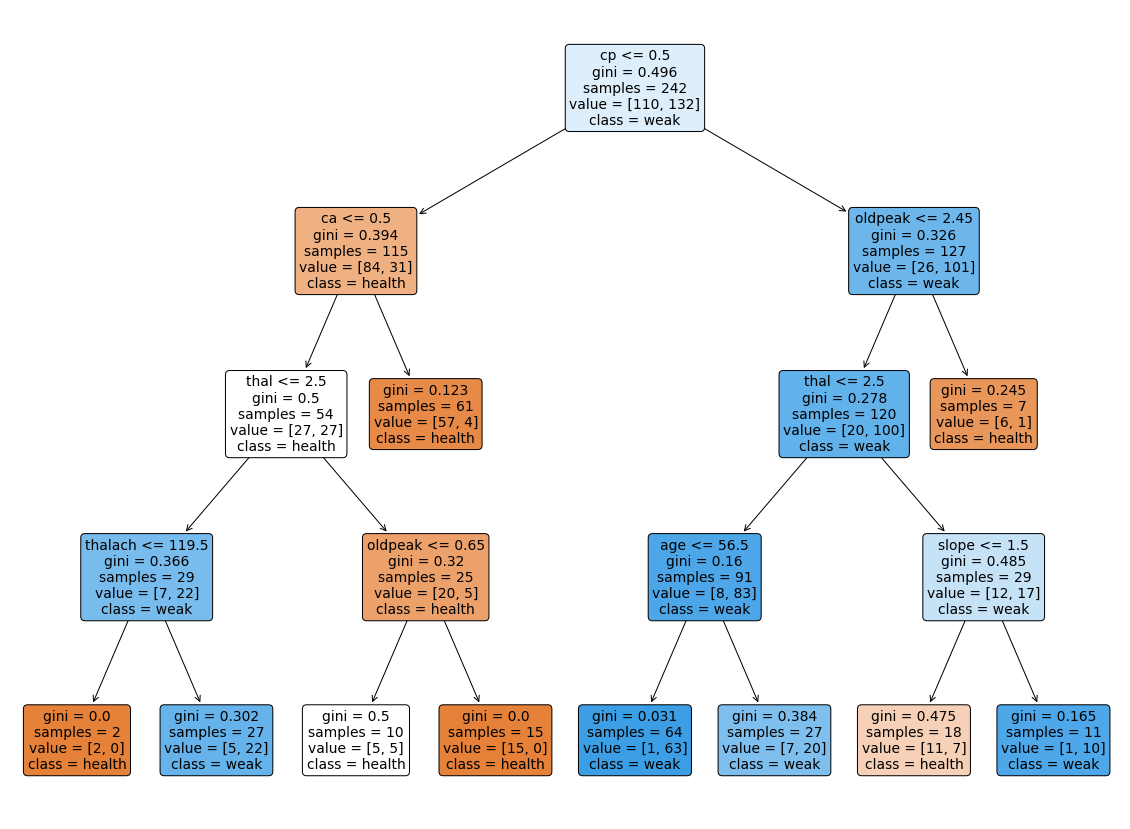

In [103]:
plt.figure(figsize=(20,15))
annotations = tree.plot_tree(model, feature_names=featureNames, class_names=["health", "weak"], filled=True, rounded=True)